In [1]:
import numpy as np
import psi4
psi4.core.set_output_file("mghp.out")

In [5]:
mol_str = """
Mg
H 1 1.6867025293730276
1 1
symmetry c1
"""
mol_tmpl = """
Mg
H 1 **R**
symmetry c1
1 1
"""

#   0       0.000002245286    -199.916750934232      -199.916750934230521
#   1       0.000001253077    -199.803071317174      
#   2       0.000001745468    -199.747373835208      -199.747373835205877



rs = np.linspace(1.1, 3.5, 100)

options_dict = {
    "basis": "cc-pVTZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "frozen_docc" : [2],
    "active" : [12],
    "num_roots" : 4
}
#    'num_roots' : 6,
#    'frozen_docc' : [28],
#    'active' : [12],
#    'TDM' :  True,
#    'OPDM': True,
#    'dipmom' : True
#}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)

In [ ]:
scf_e = []
eg = []
e1 = []
e2 = []
for r_val in rs:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scfe, wfn = psi4.energy('SCF', return_wfn=True, molecule=mol)
    scf_e.append(scfe)
    ci_e, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    eg.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    e1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    e2.append(wfn.variable("CI ROOT 2 TOTAL ENERGY"))

    

In [ ]:
from matplotlib import pyplot as plt
#plt.plot(rs, scf_e, label="rhf")
plt.plot(rs, eg, label="casci g")
plt.plot(rs, e1)
#plt.plot(rs, e2)
plt.xlim(1.5,2.0)
plt.ylim(-199.92, -199.7)
plt.legend()

pes = np.array([[rs], [eg], [e1]])
np.save("mghp_pes_casci_8_12_ccPVTZ.npy", pes)

[1.39845106e-01 1.23685740e-01 1.09023141e-01 9.57444763e-02
 8.37439140e-02 7.29220331e-02 6.31854883e-02 5.44469379e-02
 4.66251233e-02 3.96449350e-02 3.34373292e-02 2.79390511e-02
 2.30922027e-02 1.88437343e-02 1.51449316e-02 1.19509444e-02
 9.22037730e-03 6.91494363e-03 4.99917327e-03 3.44016503e-03
 2.20737331e-03 1.27242131e-03 6.08935175e-04 1.92395018e-04
 0.00000000e+00 1.05453045e-05 2.04309938e-04 5.62953749e-04
 1.06942310e-03 1.70786424e-03 2.46354375e-03 3.32277548e-03
 4.27285327e-03 5.30198911e-03 6.39925621e-03 7.55453634e-03
 8.75847117e-03 1.00024174e-02 1.12784049e-02 1.25790976e-02
 1.38977577e-02 1.52282108e-02 1.65648146e-02 1.79024285e-02
 1.92363845e-02 2.05624608e-02 2.18768551e-02 2.31761601e-02
 2.44573398e-02 2.57177064e-02 2.69548983e-02 2.81668588e-02
 2.93518158e-02 3.05082619e-02 3.16349353e-02 3.27308017e-02
 3.37950366e-02 3.48270083e-02 3.58262624e-02 3.67925055e-02
 3.77255913e-02 3.86255064e-02 3.94923575e-02 4.03263586e-02
 4.11278200e-02 4.189713

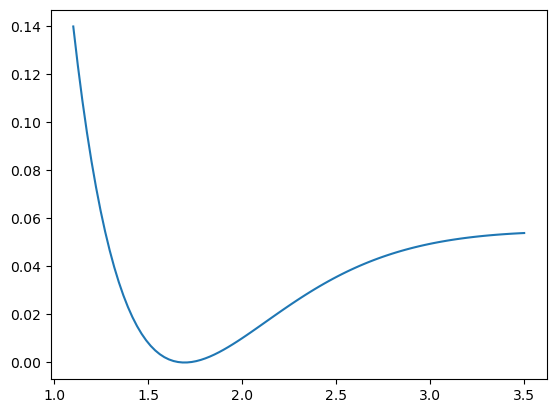

In [17]:
pes_read = np.load("mghp_pes_casci_8_12_ccPVTZ.npy")
np.shape(pes_read)
plt.plot(rs, pes_read[1,0,:]-np.min(pes_read[1,0,:]))
#plt.plot(rs, pes_read[2,0,:])

print(pes_read[1,0,:]-np.min(pes_read[1,0,:]))

In [ ]:
ci_e, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
ener = psi4.get_variable('CI ROOT 0 -> ROOT 2 EXCITATION ENERGY')
print(fci_energy)
print(ener)



In [ ]:

#transition density matrix
opdm_0 = wfn.get_opdm(1,4,"SUM", True)
dm = opdm_0.to_array()
print(dm)


#two electron integral
mints = psi4.core.MintsHelper(wfn.basisset())
I = mints.ao_eri()
D = I.to_array()
print(I.np)

#get transition dipole moment
props = ['DIPOLE', 'TRANSITION_DIPOLE']
psi4.properties('detci',properties=props)
M = ['X','Y','Z']
for i in range(6):
        for j in M:
                dipole=psi4.get_variable('CI ROOT %d -> ROOT %d DIPOLE %s'%(i,i+1,j))
                print('CI ROOT %d -> ROOT %d DIPOLE %s = %s'%(i,i+1,j,dipole))

Should look at 0->2 transition polarized along Y or the 0->5 transition polarized along Y
0->2: omega = 

At the CASCI(10,10)/cc-pVDZ level:
   @CI 16:     0   -383.432630675633   2.3093E-14   1.5364E-06 c
   @CI 16:     1   -383.229174086435   -7.1054E-15   2.1810E-06 c
   @CI 16:     2   -383.214958443052   3.5527E-15   2.5621E-06 c
   @CI 16:     3   -383.160173307314   -1.4211E-14   2.8093E-06 c
   @CI 16:     4   -383.150441547330   -9.3614E-11   3.6503E-06 c
   @CI 16:     5   -383.136370898717   2.8422E-14   2.1271E-06 c


Properties computed using the CI ROOT 0 -> ROOT 1 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0109742            0.0000000           -0.0109742
 Dipole Y            :          0.0000004            0.0000000            0.0000004
 Dipole Z            :          0.0000006            0.0000000            0.0000006
 Magnitude           :                                                    0.0109742

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 2 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000053            0.0000000            0.0000053
 Dipole Y            :         -0.8601870            0.0000000           -0.8601870
 Dipole Z            :         -0.0000003            0.0000000           -0.0000003
 Magnitude           :                                                    0.8601870

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 3 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000005            0.0000000           -0.0000005
 Dipole Y            :          0.0000002            0.0000000            0.0000002
 Dipole Z            :          0.0000026            0.0000000            0.0000026
 Magnitude           :                                                    0.0000026

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 4 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000016            0.0000000            0.0000016
 Dipole Y            :          0.0000007            0.0000000            0.0000007
 Dipole Z            :          0.0000006            0.0000000            0.0000006
 Magnitude           :                                                    0.0000018

 ------------------------------------------------------------------------------------

Properties computed using the CI ROOT 0 -> ROOT 5 density matrix


Transition Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000277            0.0000000           -0.0000277
 Dipole Y            :          1.3532848            0.0000000            1.3532848
 Dipole Z            :         -0.0000043            0.0000000           -0.0000043
 Magnitude           :                                                    1.3532848

 ------------------------------------------------------------------------------------




In [ ]:
E = np.array([-383.432630675633, -383.229174086435, -383.214958443052, -383.160173307314, -383.150441547330, -383.136370898717])
omega_02 = E[2]-E[0]
omega_05 = E[5]-E[0]

print(omega_02)
print(omega_05)